Energy
====================

## Variable description
- date time year-month-day hour:minute:second 
- Appliances, energy use in Wh
- lights, energy use of light fixtures in the house in Wh
- T1, Temperature in kitchen area, in Celsius
- RH_1, Humidity in kitchen area, in %
- T2, Temperature in living room area, in Celsius
- RH_2, Humidity in living room area, in %
- T3, Temperature in laundry room area
- RH_3, Humidity in laundry room area, in %
- T4, Temperature in office room, in Celsius
- RH_4, Humidity in office room, in %
- T5, Temperature in bathroom, in Celsius
- RH_5, Humidity in bathroom, in %
- T6, Temperature outside the building (north side), in Celsius
- RH_6, Humidity outside the building (north side), in %
- T7, Temperature in ironing room , in Celsius
- RH_7, Humidity in ironing room, in %
- T8, Temperature in teenager room 2, in Celsius
- RH_8, Humidity in teenager room 2, in %
- T9, Temperature in parents room, in Celsius
- RH_9, Humidity in parents room, in %
- To, Temperature outside (from Chièvres weather station), in Celsius
- Pressure (from Chièvres weather station), in mm Hg
- RH_out, Humidity outside (from Chièvres weather station), in %
- Windspeed (from Chièvres weather station), in m/s
- Visibility (from Chièvres weather station), in km
- Tdewpoint (from Chièvres weather station), °C
- rv1, Random variable 1, nondimensional
- rv2, Rnadom variable 2, nondimensional

Where indicated, data from the nearest airport weather station (Chièvres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4 months of data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tsmall import *

In [3]:
data_A = pd.read_csv('energy_data.csv', parse_dates=['date'])
data_A.set_index('date', inplace=True)

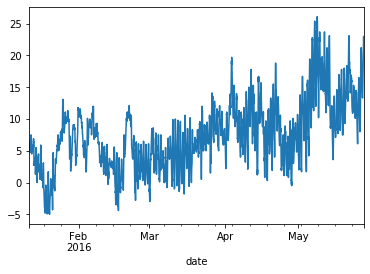

In [4]:
data_A.T_out.plot()

In [5]:
ts_index = ['T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4',
       'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8', 'RH_8', 'T9',
       'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Tdewpoint', 'Appliances']

norm_data = data_A[ts_index].apply(min_max_normalization)
norm_data.describe()
test = dfaug(norm_data)

/Users/fdesmond/Dropbox/Coding/SEME ts/tsmall/augment.py:48: ComplexWarning: Casting complex values to real discards the imaginary part
  X_dist[i:i+t_int, j] = tsaug(X_dist[i:i+t_int, j], sigma=sigma)


In [8]:
norm_data.describe()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Appliances
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,0.517061,0.364271,0.308303,0.561170,0.421038,0.489601,0.518499,0.485143,0.407272,0.317777,...,0.523873,0.457031,0.478234,0.512655,0.399089,0.609828,0.733558,0.288554,0.468810,0.081958
std,0.169595,0.109512,0.159412,0.114438,0.166676,0.152107,0.184044,0.185289,0.176266,0.135656,...,0.179081,0.179039,0.209647,0.171833,0.170978,0.172080,0.196067,0.175087,0.189803,0.095818
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.419219,0.283735,0.195542,0.490299,0.298272,0.380122,0.399099,0.335894,0.281653,0.234337,...,0.410436,0.324423,0.323621,0.386313,0.278671,0.503101,0.609649,0.142857,0.339367,0.037383
50%,0.507920,0.347675,0.283499,0.563408,0.407112,0.456302,0.501502,0.458387,0.387960,0.289821,...,0.530363,0.437800,0.468262,0.485651,0.383173,0.623256,0.785088,0.261905,0.453997,0.046729
75%,0.613516,0.441519,0.392537,0.641016,0.505982,0.607260,0.630631,0.618722,0.505460,0.358586,...,0.648459,0.580398,0.594173,0.627956,0.495445,0.735659,0.890351,0.392857,0.595777,0.084112
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
test.describe()

,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,RH_5,...,T8,RH_8,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Tdewpoint,Appliances
count,39470.000000,39470.000000,39470.000000,39470.000000,39470.000000,39470.000000,39470.000000,39470.000000,39470.000000,39470.000000,...,39470.000000,39470.000000,39470.000000,39470.000000,39470.000000,39470.000000,39470.000000,39470.000000,39470.000000,39470.000000
mean,0.487466,0.363605,0.280368,0.569554,0.382942,0.500141,0.470923,0.493385,0.370541,0.322177,...,0.498078,0.463557,0.434210,0.519975,0.376461,0.630955,0.748711,0.301520,0.450961,0.082360
std,0.158312,0.104929,0.140381,0.101772,0.148853,0.155108,0.164700,0.188664,0.154084,0.133667,...,0.177543,0.183752,0.188283,0.172725,0.152142,0.175883,0.178465,0.184142,0.175671,0.098570
min,0.000000,0.000000,0.000000,0.000000,-0.009869,0.000000,0.000000,0.000000,-0.009210,0.000000,...,0.000000,0.000000,-0.012775,0.000000,-0.024490,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.403680,0.285570,0.186576,0.509590,0.276715,0.386197,0.377477,0.341300,0.264692,0.241304,...,0.383888,0.331277,0.301769,0.387555,0.277599,0.518605,0.631579,0.142857,0.337104,0.037383
50%,0.488648,0.346740,0.263872,0.574019,0.381356,0.459106,0.467568,0.466496,0.360248,0.288811,...,0.517292,0.448801,0.448491,0.487762,0.369775,0.640310,0.791667,0.273810,0.448718,0.046729
75%,0.580781,0.442161,0.356191,0.640172,0.463985,0.625767,0.549550,0.627543,0.455805,0.362789,...,0.621910,0.590359,0.552549,0.634658,0.466238,0.767442,0.888158,0.416667,0.561086,0.084112
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


[Text(0, 0.5, 'Appliances')]

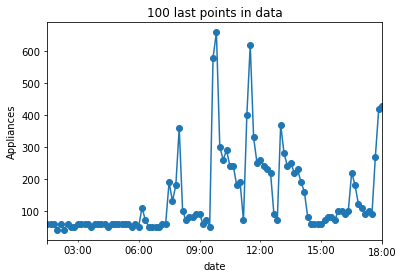

In [5]:
data_A.Appliances.iloc[-100:].plot(marker='o', title='100 last points in data').set(ylabel='Appliances')

## data_B
### random block sampling 
Samples k blocks of size l.

In [20]:
def block_sampling(N, k, l):
    '''select k distinct intervals of size l from 0 to N
    
    return: a boolean series of length N.
    '''
    seq = list(range(N))
    indices = range(N - (l - 1) * k)
    result = np.array([False] * N)
    offset = 0
    for i in sorted(np.random.choice(indices, k)):
        i += offset
        result[seq[i:i+l]] = 1
        offset += l - 1
    return result

Dataframe data_B using previous function with 5 blocks of length 60 -> n = 5 * 60 = 300

In [21]:
indices_B = block_sampling(data_A.shape[0], 5, 60)
data_B = data_A[indices_B]
display(data_B.shape)

(300, 28)

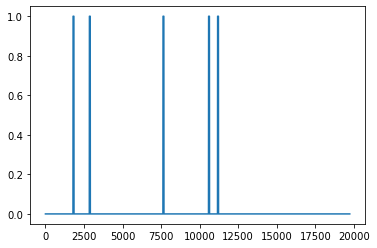

In [22]:
plt.plot(indices_B)

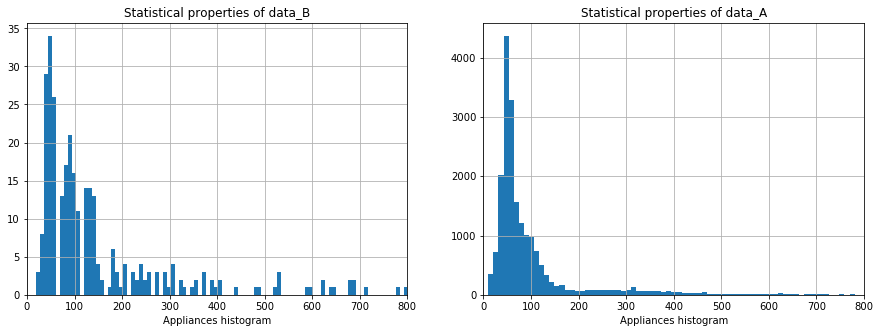

In [23]:
fig, ax = plt.subplots(figsize=[15,5], nrows=1, ncols=2)
ax[0].set(title='Statistical properties of data_B', xlabel='Appliances histogram', xlim=[0,800])
ax[1].set(title='Statistical properties of data_A', xlabel='Appliances histogram', xlim=[0,800])

data_B.Appliances.hist(bins=100, ax=ax[0])
data_A.Appliances.hist(bins=100, ax=ax[1])

### Training RF on data_A

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

y_A = data_A.Appliances
X_A = data_A.drop(columns='Appliances')

xtrain_A, xtest_A, ytrain_A, ytest_A = train_test_split(X_A, y_A, random_state=42)

rf_A = RandomForestRegressor()

In [14]:
rf_A.fit(xtrain_A, ytrain_A)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [15]:
rf_A.score(xtrain_A, ytrain_A)

0.9303258629308374

In [16]:
rf_A.score(xtest_A, ytest_A)

0.5162060461921605

Parameters should be tuned to prevent overfitting.

### Training RF on data_B and evaluating on data_A

In [17]:
y_B = data_B.Appliances
X_B = data_B.drop(columns='Appliances')

xtrain_B, xtest_B, ytrain_B, ytest_B = train_test_split(X_B, y_B, random_state=42)

rf_B = RandomForestRegressor()
rf_B.fit(xtrain_B, ytrain_B)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [18]:
rf_B.score(xtest_B, ytest_B)

0.3284659770636527

In [19]:
rf_B.score(xtest_A, ytest_A)

-1.436204601330184

Our model is doing worst than the constant prediction on the bigger database -> it is highly overfitting.